# prediction using supervised ML

In this task we predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables,implemented using python scikit-learn library.

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data from url
url ='http://bit.ly/w-data'
data = pd.read_csv(url)
len(data)

25

In [3]:
data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# visualising the data

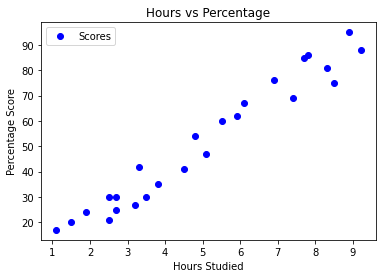

In [7]:
#plotting the relationship between the hours and scores
data.plot(x='Hours', y='Scores', style='o',c='blue')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show() 

by the distribution seen above we can conclude that the percentage of a student increases wrt the number of hours he studies.

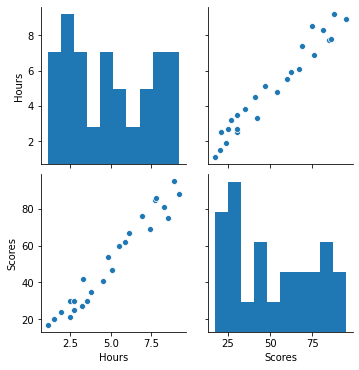

In [8]:
sns.pairplot(data)

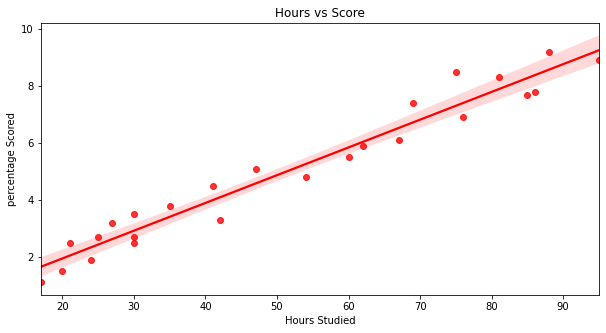

In [9]:
plt.figure(figsize=(10,5))
sns.regplot(data['Scores'],data['Hours'],color='red')
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('percentage Scored') 
plt.show()

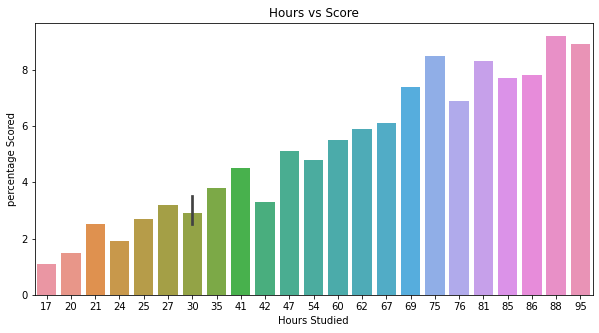

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(data['Scores'],data['Hours'])
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('percentage Scored') 
plt.show()

# Splitting the data for traing and testing

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# training the regression model

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

# predicting the result on test set

In [13]:
y_pred = reg.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# comparing the prediction with actual data and predicted result

In [14]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# predicting the percentage if a student studies for 9.25 hrs/day

In [15]:
hours = [[9.25]]
score_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}%".format(score_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538%


#  calculating the mean absolute error and mean squared error

In [16]:
from sklearn import metrics   
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared Error:',  metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean squared Error: 21.5987693072174


# Evaluating the accuracy

In [17]:
Accu=reg.score(x_test,y_test)*100
print('Accuracy is {} '.format(Accu))

Accuracy is 94.54906892105356 
